Load the libraries

In [1]:
# Importing required libraries
# For Manipulating the data
import pandas as pd
# For Mathametical calculations
import numpy as np
# For Logistic regression model
from sklearn.linear_model import LogisticRegression
# For Visualizations
import matplotlib.pyplot as plt
# For Model performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# For Test train split for validation
from sklearn.model_selection import train_test_split
# For saving the model
import pickle
# Visualization style
plt.style.use('fivethirtyeight')

Import the data

In [2]:
# Load the dataset in a dataframe object
url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
raw_df = pd.read_csv(url)
# View first 5 rows of the data
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Descriptive Statistics

In [3]:
# Data description
raw_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Leonard, Mr. Lionel",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


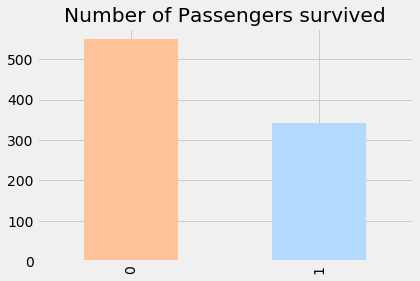

In [4]:
# Bar plot for number of Passengers survived
raw_df['Survived'].value_counts().plot(kind= 'bar', color= ["#ffc299","#b3d9ff"])
# Plot title
plt.title('Number of Passengers survived')
plt.show()

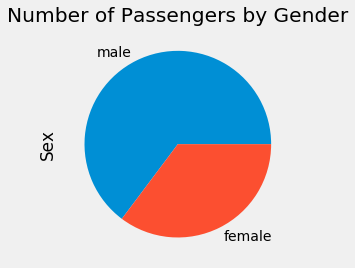

In [5]:
# Pie chart for number of Passengers by Gender
raw_df['Sex'].value_counts().plot(kind= 'pie')
plt.title('Number of Passengers by Gender')
plt.show()

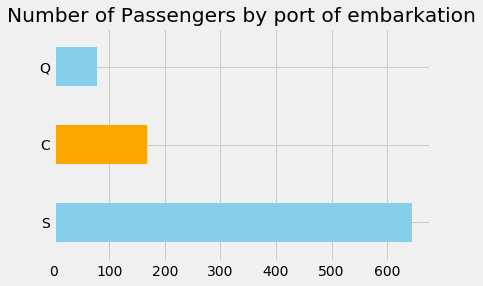

In [6]:
# Horizontal Bar plot for number of Passengers port of embarkation
raw_df['Embarked'].value_counts().plot(kind= 'barh', color= ["skyblue", "orange"])
# Plot title
plt.title('Number of Passengers by port of embarkation')
plt.show()

Data Processing

In [7]:
# Select a subset of data with 4 columns
include = ['Age', 'Sex', 'Embarked', 'Survived'] 
df = raw_df[include]
df.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,1
2,26.0,female,S,1
3,35.0,female,S,1
4,35.0,male,S,0


In [8]:
# Remove null values
df=df.dropna()
# Check for null values in all the columns
df.isnull().sum()

Age         0
Sex         0
Embarked    0
Survived    0
dtype: int64

In [9]:
# Create Dummy varaibles for the categorical variables in the data
proc_df = pd.get_dummies(df, columns=["Sex","Embarked"])
proc_df.head()

,Age,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,0,1,0,0,1
1,38.0,1,1,0,1,0,0
2,26.0,1,1,0,0,0,1
3,35.0,1,1,0,0,0,1
4,35.0,0,0,1,0,0,1


In [10]:
# Test train split
y=proc_df.pop("Survived")
x=proc_df
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

Logistic Regression Model

In [11]:
# Logistic Regression
model = LogisticRegression()
# Fit the model
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Validation

In [12]:
# Predict values for the test data
y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.7811244979919679
Testing Accuracy : 0.7757009345794392


In [13]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# dataframe of cm to change the labels
df_cm = pd.DataFrame(cm, index = [i for i in ['Not Survived','Survived'] ],
                  columns = [i for i in ['Not Survived','Survived']])
print(df_cm)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%\n")


              Not Survived  Survived
Not Survived           102        24
Survived                24        64
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       126
           1       0.73      0.73      0.73        88

    accuracy                           0.78       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214

Accuracy: 77.57%



Save the Model

In [14]:
# save the model into disk
pickle.dump( model, open( "model.pkl", "wb" ) )
print("Model Saved")

Model Saved


In [15]:
# save the model columns into disk
model_columns = list(x.columns)
pickle.dump( model_columns, open( "model_columns.pkl", "wb" ) )
print("Model columns saved")

Models columns dumped!
